In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
df = pd.read_csv('waist2.csv')

In [5]:
df[df['class']=='1']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,1,0.066604,-0.610972,-0.070393,0.999993,0.074290,-0.647736,-0.053091,0.999988,0.074814,...,0.079698,0.857567,0.137578,0.879945,-0.034886,0.984467,-0.172981,0.852699,-0.041728,0.981283
1,1,0.064863,-0.611199,-0.069464,0.999993,0.072579,-0.648095,-0.052577,0.999987,0.073104,...,0.098646,0.857009,0.134091,0.879993,-0.024808,0.984617,-0.173112,0.852283,-0.024418,0.981379
2,1,0.066107,-0.612227,-0.124284,0.999992,0.074591,-0.648504,-0.101952,0.999985,0.075187,...,0.090422,0.855941,0.171813,0.884434,-0.053206,0.985214,-0.100698,0.860351,-0.032698,0.981697
3,1,0.053029,-0.620686,-0.149877,0.999992,0.060047,-0.656319,-0.128942,0.999985,0.060594,...,0.093820,0.860824,0.202004,0.880988,-0.053502,0.985915,-0.078328,0.860769,-0.026552,0.982476
4,1,0.046339,-0.633035,-0.177780,0.999992,0.053611,-0.667646,-0.156301,0.999982,0.054099,...,0.099181,0.861905,0.197976,0.877871,-0.052707,0.986177,-0.068037,0.860547,-0.022020,0.982828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,1,0.025726,-0.628513,-0.202384,0.996713,0.031466,-0.665055,-0.189786,0.995621,0.031792,...,0.214209,0.186882,0.166473,0.770723,0.101361,0.237670,-0.055653,0.773393,0.100705,0.241158
4377,1,0.021272,-0.627849,-0.190114,0.996273,0.027633,-0.664400,-0.180042,0.994989,0.027951,...,0.203731,0.180168,0.166299,0.771452,0.102905,0.227618,-0.055054,0.773475,0.089045,0.231819
4378,1,0.018234,-0.629490,-0.186022,0.995743,0.024862,-0.665939,-0.176457,0.994232,0.025172,...,0.198958,0.174715,0.166138,0.771724,0.103212,0.219422,-0.055503,0.775128,0.083750,0.224370
4379,1,0.011300,-0.632021,-0.187423,0.995570,0.017903,-0.668403,-0.177576,0.993982,0.018243,...,0.201535,0.170292,0.168067,0.771979,0.100417,0.214321,-0.058427,0.775379,0.086886,0.219152


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5430 entries, 0 to 5429
Columns: 133 entries, class to v33
dtypes: float64(132), object(1)
memory usage: 5.5+ MB


In [7]:
X = df.drop('class', axis=1) # features: 동작 이름을 제외한 모든 항목
y = df['class'] # target value

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [9]:
y_test

537       2
971     3_1
1320    3_2
4638    3_1
1745    4_1
       ... 
3369    4_2
3635    4_2
850       2
3863    4_1
1370    3_2
Name: class, Length: 1629, dtype: object

In [10]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [11]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [12]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=1000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [13]:
fit_models['lr'].predict(X_test)

array(['2', '3_1', '3_2', ..., '2', '4_1', '3_2'], dtype=object)

## Evaluating the Models

In [14]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

In [15]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9975445058317987
rc 0.9846531614487416
rf 0.9975445058317987
gb 0.9987722529158993


In [16]:
y_test

537       2
971     3_1
1320    3_2
4638    3_1
1745    4_1
       ... 
3369    4_2
3635    4_2
850       2
3863    4_1
1370    3_2
Name: class, Length: 1629, dtype: object

In [17]:
with open('wiast2.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix')

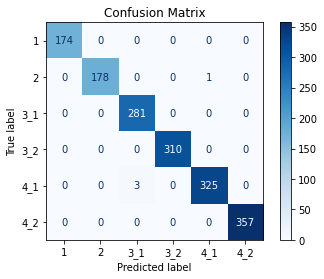

In [19]:
label=['1','2','3_1','3_2','4_1','4_2'] #waist
# label=['1','2','3_1','3_2','4','5_1','5_2','6_1','6_2','6_3'] # legs라벨 설정
plot = plot_confusion_matrix(fit_models['rf'], # 분류 모델
                             X_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Blues, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')